# Proyek Analisis Data: [Air Quality Dataset]
- **Nama:** Muhammad Fakhri Zain Pribadi
- **Email:** fakhrizain66@gmail.com
- **ID Dicoding:** MC008D5Y2347

## Menentukan Pertanyaan Bisnis

- Bagaimana tren kualitas udara (PM2.5, PM10, SO2, NO2, CO, O3) di Distrik Dongsi dalam beberapa tahun terakhir? Apakah ada pola musiman dapat diamati?
- Dapatkah kita memprediksi PM2.5 dalam beberapa hari ke depan?

## Import Semua Packages/Library yang Digunakan

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.holtwinters import ExponentialSmoothing

## Data Wrangling

### Gathering Data

In [83]:
df1 = pd.read_csv('/content/PRSA_Data_Dongsi_20130301-20170228.csv')
df1

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,9.0,9.0,3.0,17.0,300.0,89.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Dongsi
1,2,2013,3,1,1,4.0,4.0,3.0,16.0,300.0,88.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Dongsi
2,3,2013,3,1,2,7.0,7.0,NaN,17.0,300.0,60.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Dongsi
3,4,2013,3,1,3,3.0,3.0,5.0,18.0,NaN,NaN,-1.4,1026.2,-25.5,0.0,N,4.9,Dongsi
4,5,2013,3,1,4,3.0,3.0,7.0,NaN,200.0,84.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Dongsi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,16.0,51.0,3.0,29.0,400.0,73.0,12.5,1013.5,-16.2,0.0,NW,2.4,Dongsi
35060,35061,2017,2,28,20,18.0,45.0,3.0,43.0,500.0,54.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Dongsi
35061,35062,2017,2,28,21,23.0,58.0,5.0,61.0,700.0,28.0,10.8,1014.2,-13.3,0.0,NW,1.1,Dongsi
35062,35063,2017,2,28,22,23.0,53.0,9.0,75.0,900.0,15.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Dongsi


**Insight:**
- Data yang digunakan adalah data kualitas udara di negara Tiongkok pada Distrik Dongsi.
- Berisi data kualitas udara dan kondisi cuaca dari stasiun pemantauan "Dongsi" di Beijing, China. Data ini mencakup periode dari 1 Maret 2013 hingga 28 Februari 2017.

- Struktur Data

 - No: Nomor urut data.

 - year: Tahun pengukuran.

 - month: Bulan pengukuran.

 - day: Hari pengukuran.

 - hour: Jam pengukuran (dalam format 24 jam).

 - PM2.5: Konsentrasi partikel PM2.5 (µg/m³).

 - PM10: Konsentrasi partikel PM10 (µg/m³).

 - SO2: Konsentrasi sulfur dioksida (SO₂) (µg/m³).

 - NO2: Konsentrasi nitrogen dioksida (NO₂) (µg/m³).

 - CO: Konsentrasi karbon monoksida (CO) (mg/m³).

 - O3: Konsentrasi ozon (O₃) (µg/m³).

 - TEMP: Suhu udara (°C).

 - PRES: Tekanan atmosfer (hPa).

 - DEWP: Titik embun (°C).

 - RAIN: Curah hujan (mm).

 - wd: Arah angin.

 - WSPM: Kecepatan angin (m/s).

 - station: Nama stasiun pemantauan (dalam hal ini "Dongsi").

### Assessing Data

In [84]:
# Menghapus kolom Nomor
df1.drop(columns=['No'], inplace=True)

In [85]:
print(df1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   year     35064 non-null  int64  
 1   month    35064 non-null  int64  
 2   day      35064 non-null  int64  
 3   hour     35064 non-null  int64  
 4   PM2.5    34314 non-null  float64
 5   PM10     34511 non-null  float64
 6   SO2      34401 non-null  float64
 7   NO2      33463 non-null  float64
 8   CO       31867 non-null  float64
 9   O3       34400 non-null  float64
 10  TEMP     35044 non-null  float64
 11  PRES     35044 non-null  float64
 12  DEWP     35044 non-null  float64
 13  RAIN     35044 non-null  float64
 14  wd       34986 non-null  object 
 15  WSPM     35050 non-null  float64
 16  station  35064 non-null  object 
dtypes: float64(11), int64(4), object(2)
memory usage: 4.5+ MB
None


In [86]:
print("Missing Value Setiap Kolom:\n", df1.isna().sum())

Missing Value Setiap Kolom:
 year          0
month         0
day           0
hour          0
PM2.5       750
PM10        553
SO2         663
NO2        1601
CO         3197
O3          664
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           78
WSPM         14
station       0
dtype: int64


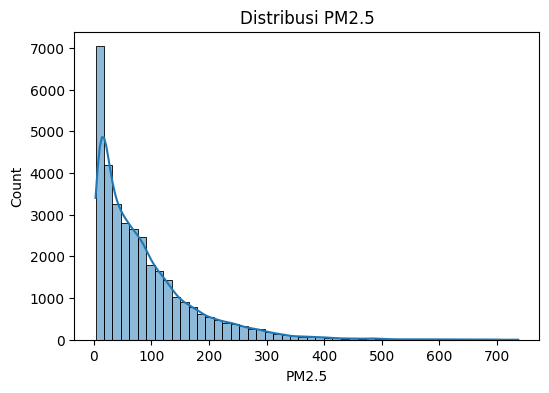

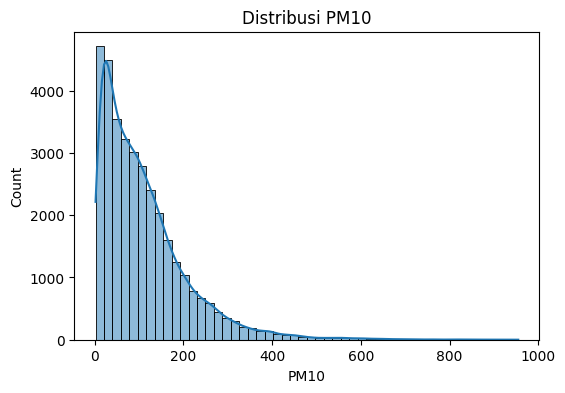

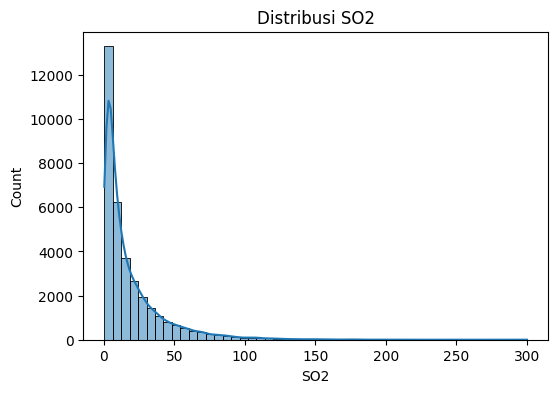

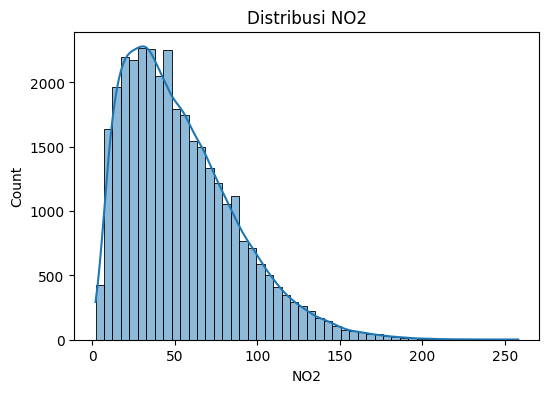

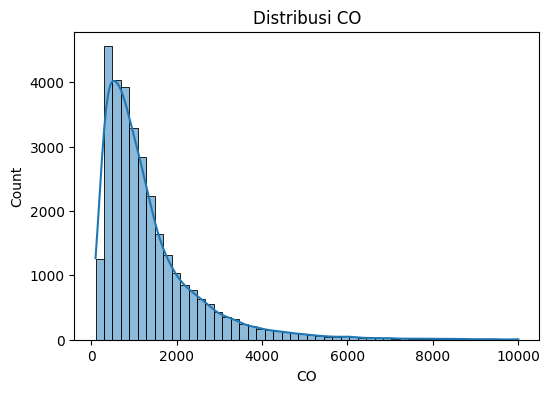

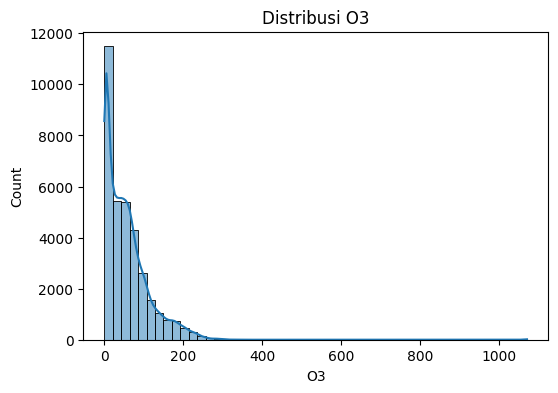

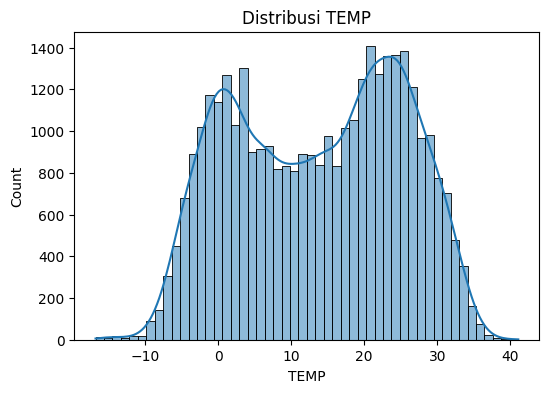

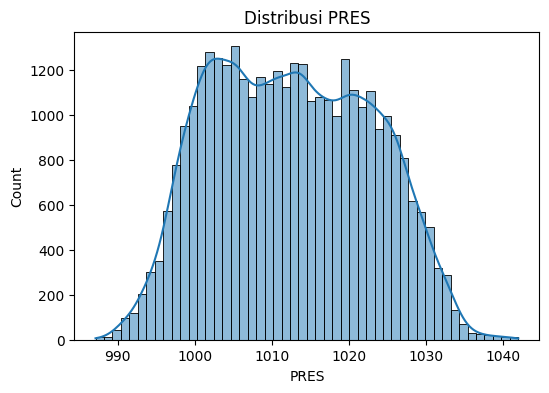

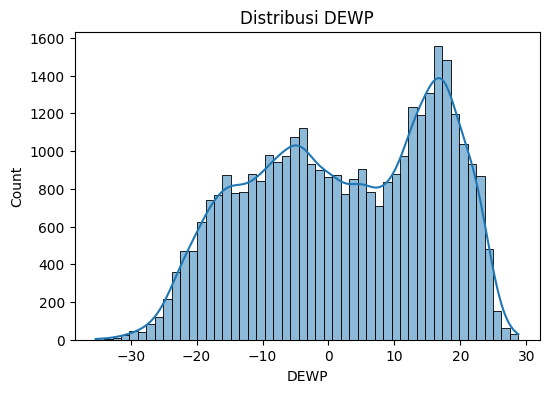

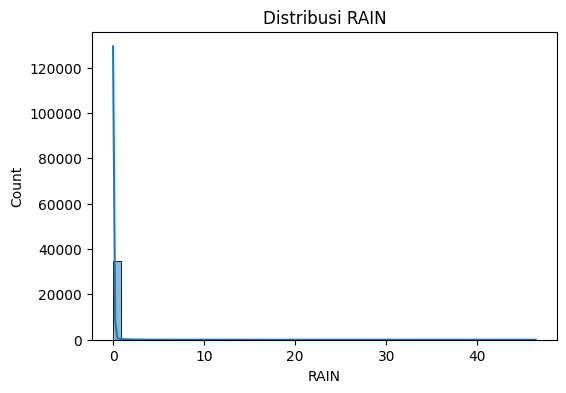

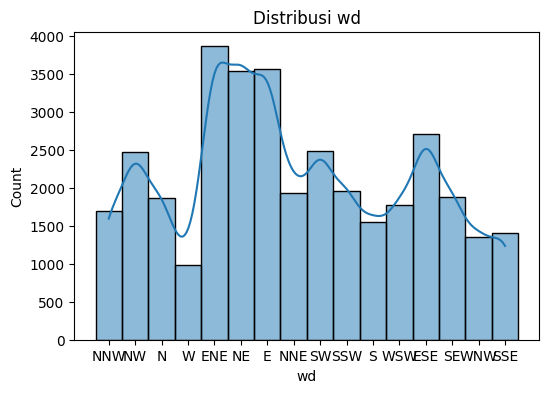

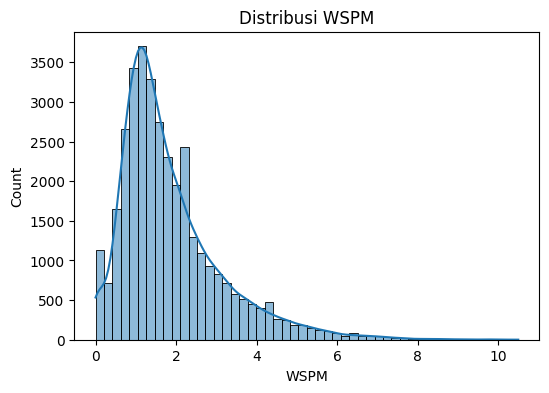

In [87]:
# Plot distribusi setiap variabel dengan missing values
missing_cols = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM']

for col in missing_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df1[col], bins=50, kde=True)
    plt.title(f"Distribusi {col}")
    plt.show()


In [88]:
print("Jumlah duplikasi: ", df1.duplicated().sum())

Jumlah duplikasi:  0


In [89]:
df1.describe()

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,34314.000000,34511.000000,34401.000000,33463.000000,31867.000000,34400.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000
mean,2014.662560,6.522930,15.729637,11.500000,86.194297,110.336742,18.531107,53.699443,1330.069131,57.210637,13.671490,1012.547419,2.447535,0.064020,1.860785
std,1.177213,3.448752,8.800218,6.922285,86.575127,98.219860,22.905655,33.959230,1191.305887,58.033275,11.458418,10.266059,13.810696,0.786282,1.280368
min,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,2.000000,100.000000,0.642600,-16.800000,987.100000,-35.300000,0.000000,0.000000
25%,2014.000000,4.000000,8.000000,5.750000,22.000000,38.000000,4.000000,27.000000,600.000000,12.000000,3.100000,1004.000000,-8.800000,0.000000,1.000000
50%,2015.000000,7.000000,16.000000,11.500000,61.000000,86.000000,10.000000,47.000000,1000.000000,44.125200,14.600000,1012.200000,3.000000,0.000000,1.500000
75%,2016.000000,10.000000,23.000000,17.250000,119.000000,151.000000,24.000000,73.000000,1700.000000,81.000000,23.500000,1020.900000,15.000000,0.000000,2.400000
max,2017.000000,12.000000,31.000000,23.000000,737.000000,955.000000,300.000000,258.000000,10000.000000,1071.000000,41.100000,1042.000000,28.800000,46.400000,10.500000


**Insight:**
- Masih terdapat banyak missing value didalam data, harus ditangani.
- Sebagian besar distribusi pada kolom numerik bersifat skewed, sehingga terdapat indikasi banyaknya outlier, hal ini akan dibiarkan apa adanya terlebih dahulu agar bisa terlihat tren asli.

### Cleaning Data

In [90]:
# Mengatasi missing Value
# Imputasi menggunakan median untuk kolom numerik
num_cols = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']
for col in num_cols:
    df1[col] = df1[col].fillna(df1[col].median())

Berdasarkan plot distribusi setiap variabel pada kolom numerik dengan missing values, didapatkan data yang ada berdistribusi skewed, sehingga akan digunakan median agar tidak dipengaruhi oleh outlier.



In [91]:
# Imputasi menggunakan modus untuk kolom kategorikal
df1['wd'] = df1['wd'].fillna(df1['wd'].mode()[0])

In [92]:
print("Missing Value Setelah Imputasi:\n", df1.isna().sum())

Missing Value Setelah Imputasi:
 year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64


In [93]:
# Menyatukan Kolom Tanggal dan Waktu
df1['datetime'] = pd.to_datetime(df1[['year', 'month', 'day', 'hour']])
df1.drop(columns=['year', 'month', 'day', 'hour'], inplace=True)
df1

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,datetime
0,9.0,9.0,3.0,17.0,300.0,89.0000,-0.5,1024.5,-21.4,0.0,NNW,5.7,Dongsi,2013-03-01 00:00:00
1,4.0,4.0,3.0,16.0,300.0,88.0000,-0.7,1025.1,-22.1,0.0,NW,3.9,Dongsi,2013-03-01 01:00:00
2,7.0,7.0,10.0,17.0,300.0,60.0000,-1.2,1025.3,-24.6,0.0,NNW,5.3,Dongsi,2013-03-01 02:00:00
3,3.0,3.0,5.0,18.0,1000.0,44.1252,-1.4,1026.2,-25.5,0.0,N,4.9,Dongsi,2013-03-01 03:00:00
4,3.0,3.0,7.0,47.0,200.0,84.0000,-1.9,1027.1,-24.5,0.0,NNW,3.2,Dongsi,2013-03-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,16.0,51.0,3.0,29.0,400.0,73.0000,12.5,1013.5,-16.2,0.0,NW,2.4,Dongsi,2017-02-28 19:00:00
35060,18.0,45.0,3.0,43.0,500.0,54.0000,11.6,1013.6,-15.1,0.0,WNW,0.9,Dongsi,2017-02-28 20:00:00
35061,23.0,58.0,5.0,61.0,700.0,28.0000,10.8,1014.2,-13.3,0.0,NW,1.1,Dongsi,2017-02-28 21:00:00
35062,23.0,53.0,9.0,75.0,900.0,15.0000,10.5,1014.4,-12.9,0.0,NNW,1.2,Dongsi,2017-02-28 22:00:00


**Insight:**
- Karena data numerik memiliki sebagian besar berdistribusi skewed, median digunakan untuk imputasi agar hasilnya lebih representatif dan tidak terpengaruh oleh outlier. Jika menggunakan mean, data bisa terdistorsi akibat nilai ekstrem. Penggunaan median memastikan nilai yang diisi tetap dalam rentang yang wajar.
- Modus dipilih karena data wd (arah angin) bersifat kategorikal, sehingga mengisi dengan nilai yang paling sering muncul adalah pendekatan yang masuk akal.
- Setelah imputasi, semua kolom memiliki 0 missing values, artinya data kini lebih siap untuk analisis lebih lanjut.
- Untuk mempermudah analisis data tren, disatukannya kolom 'year', 'month', 'day', 'hour' menjadi satu pada kolom baru 'datetime'.

## Exploratory Data Analysis (EDA)

### Explore ...

array([[<Axes: title={'center': 'PM2.5'}>,
        <Axes: title={'center': 'PM10'}>,
        <Axes: title={'center': 'SO2'}>],
       [<Axes: title={'center': 'NO2'}>, <Axes: title={'center': 'CO'}>,
        <Axes: title={'center': 'O3'}>],
       [<Axes: title={'center': 'TEMP'}>,
        <Axes: title={'center': 'PRES'}>,
        <Axes: title={'center': 'DEWP'}>],
       [<Axes: title={'center': 'RAIN'}>,
        <Axes: title={'center': 'WSPM'}>,
        <Axes: title={'center': 'datetime'}>]], dtype=object)

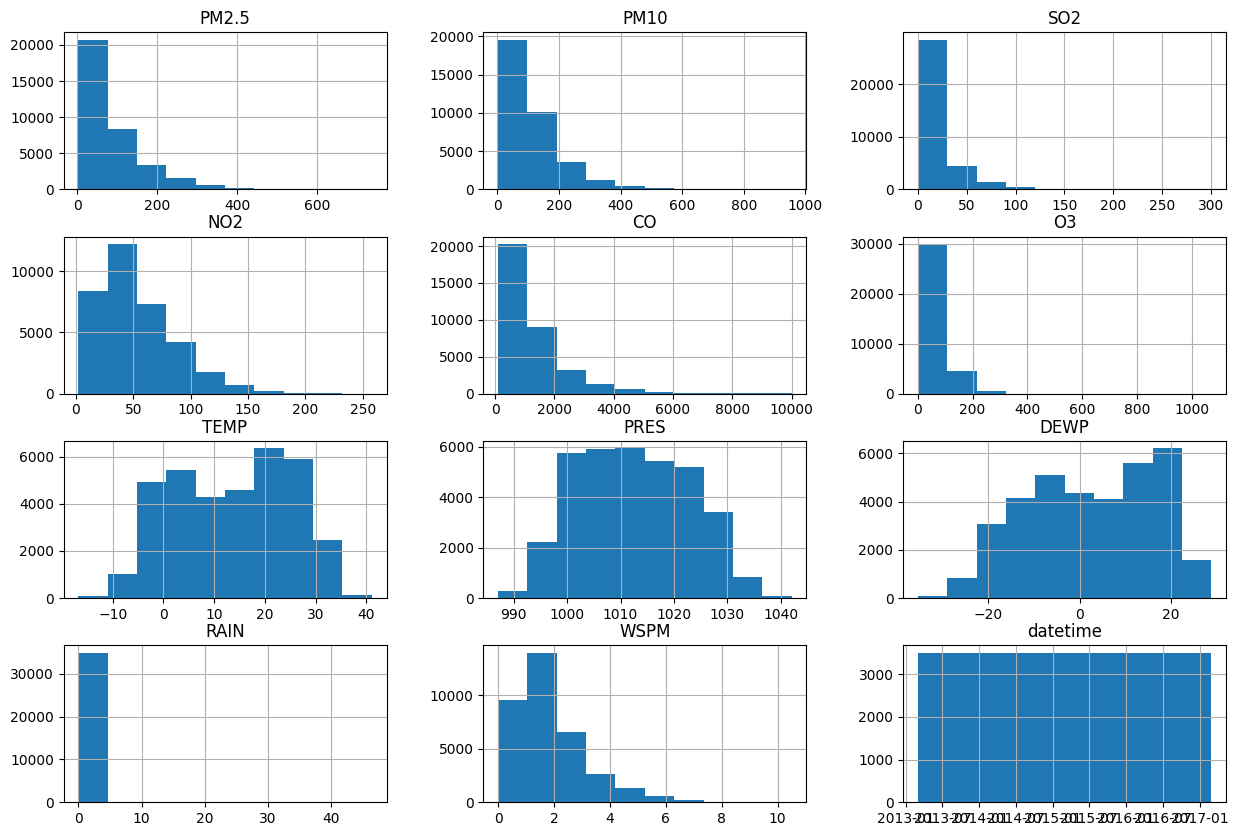

In [94]:
df1.hist(figsize=(15, 10))

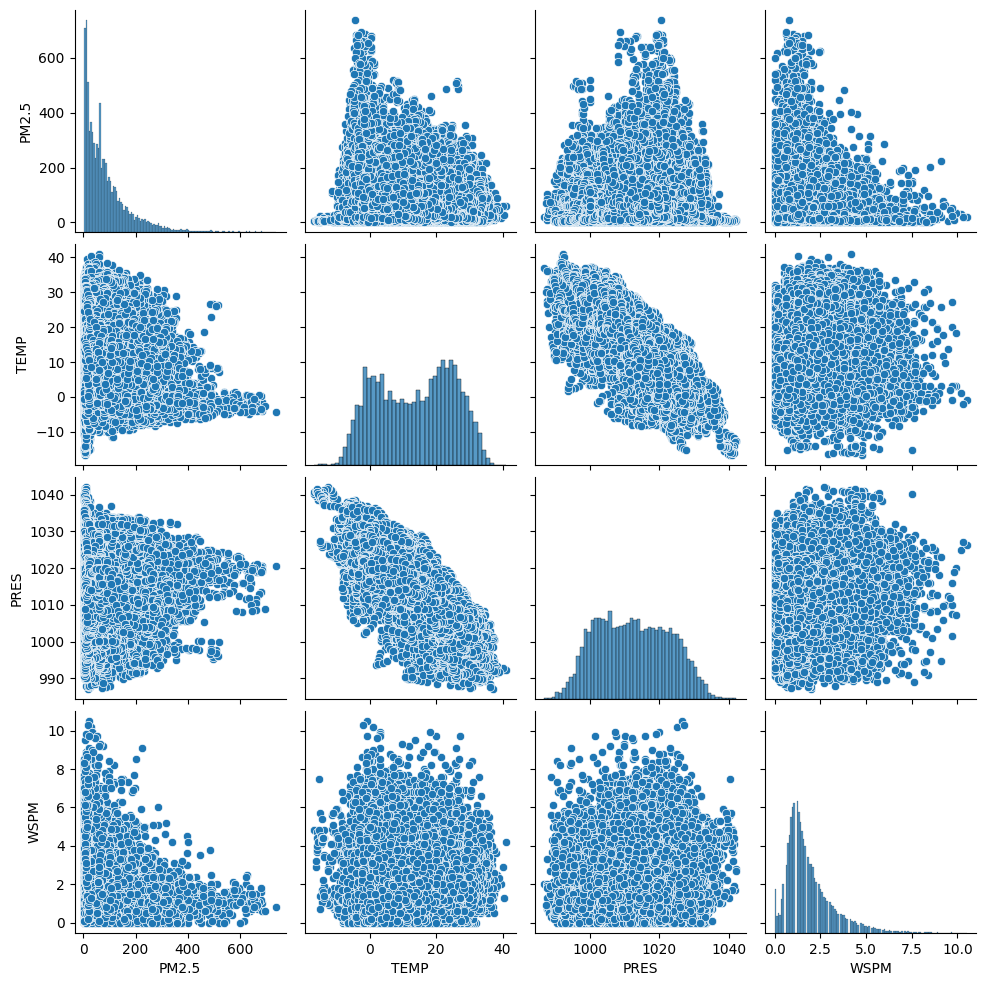

In [95]:
# Scatter Plot untuk Melihat Korelasi
sns.pairplot(df1, vars=['PM2.5', 'TEMP', 'PRES', 'WSPM'])
plt.show()

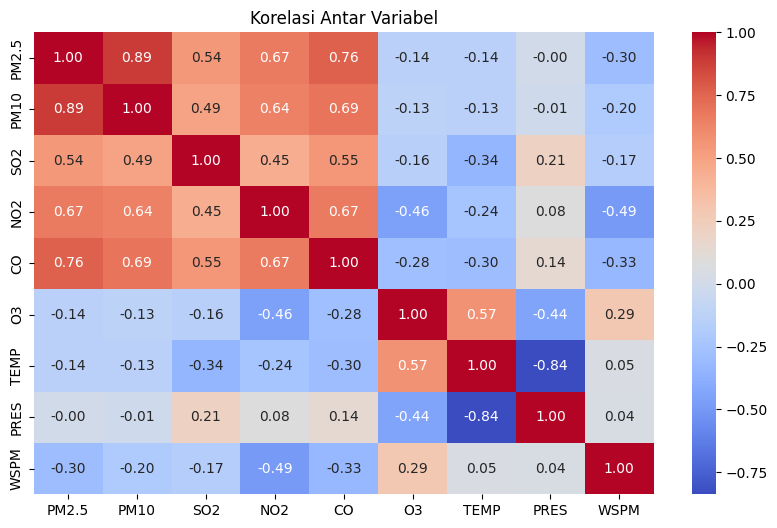

In [96]:
# Heatmap Korelasi
plt.figure(figsize=(10, 6))
sns.heatmap(df1[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'WSPM']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Korelasi Antar Variabel")
plt.show()


In [97]:
# Hari dengan PM2.5 Tertinggi
top_polluted_days = df1.nlargest(10, 'PM2.5')[['datetime', 'PM2.5']]
print(top_polluted_days)

                 datetime  PM2.5
8423  2014-02-14 23:00:00  737.0
25779 2016-02-08 03:00:00  695.0
24116 2015-11-30 20:00:00  685.0
24117 2015-11-30 21:00:00  685.0
8422  2014-02-14 22:00:00  684.0
34300 2017-01-28 04:00:00  681.0
24133 2015-12-01 13:00:00  680.0
8424  2014-02-15 00:00:00  679.0
24134 2015-12-01 14:00:00  678.0
24135 2015-12-01 15:00:00  671.0


**Insight:**
- Hubungan Antar Polutan
 - PM2.5 & PM10 memiliki korelasi sangat kuat (+0.89)
 - CO berkorelasi tinggi dengan PM2.5 (+0.76) dan NO2 (+0.67)
 - NO2 & SO2 memiliki korelasi sedang (+0.45)

- Hubungan Polusi dengan Faktor Cuaca
 - PM2.5 & PM10 berkorelasi negatif dengan kecepatan angin (WSPM)
 - PM2.5 & PM10 berkorelasi negatif dengan suhu (TEMP -0.14)
 - Tekanan udara (PRES) berkorelasi sangat negatif dengan suhu (-0.84)

 Kualitas udara cenderung memburuk saat suhu rendah dan kecepatan angin rendah karena polutan terperangkap di atmosfer akibat inversi suhu dan minimnya penyebaran oleh angin. Selain itu, CO dan NO2 memiliki korelasi tinggi dengan PM2.5 dan PM10, menjadikannya indikator utama pencemaran udara, terutama karena ketiganya berasal dari sumber yang sama, seperti emisi kendaraan dan aktivitas industri. Polutan ini menunjukkan bahwa aktivitas manusia berkontribusi besar terhadap pencemaran udara di Distrik Dongsi.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana tren kualitas udara (PM2.5, PM10, SO2, NO2, CO, O3) di Distrik Dongsi dalam beberapa tahun terakhir? Apakah ada pola musiman dapat diamati?

In [98]:
df1.set_index('datetime', inplace=True)
print(df1.index)

DatetimeIndex(['2013-03-01 00:00:00', '2013-03-01 01:00:00',
               '2013-03-01 02:00:00', '2013-03-01 03:00:00',
               '2013-03-01 04:00:00', '2013-03-01 05:00:00',
               '2013-03-01 06:00:00', '2013-03-01 07:00:00',
               '2013-03-01 08:00:00', '2013-03-01 09:00:00',
               ...
               '2017-02-28 14:00:00', '2017-02-28 15:00:00',
               '2017-02-28 16:00:00', '2017-02-28 17:00:00',
               '2017-02-28 18:00:00', '2017-02-28 19:00:00',
               '2017-02-28 20:00:00', '2017-02-28 21:00:00',
               '2017-02-28 22:00:00', '2017-02-28 23:00:00'],
              dtype='datetime64[ns]', name='datetime', length=35064, freq=None)


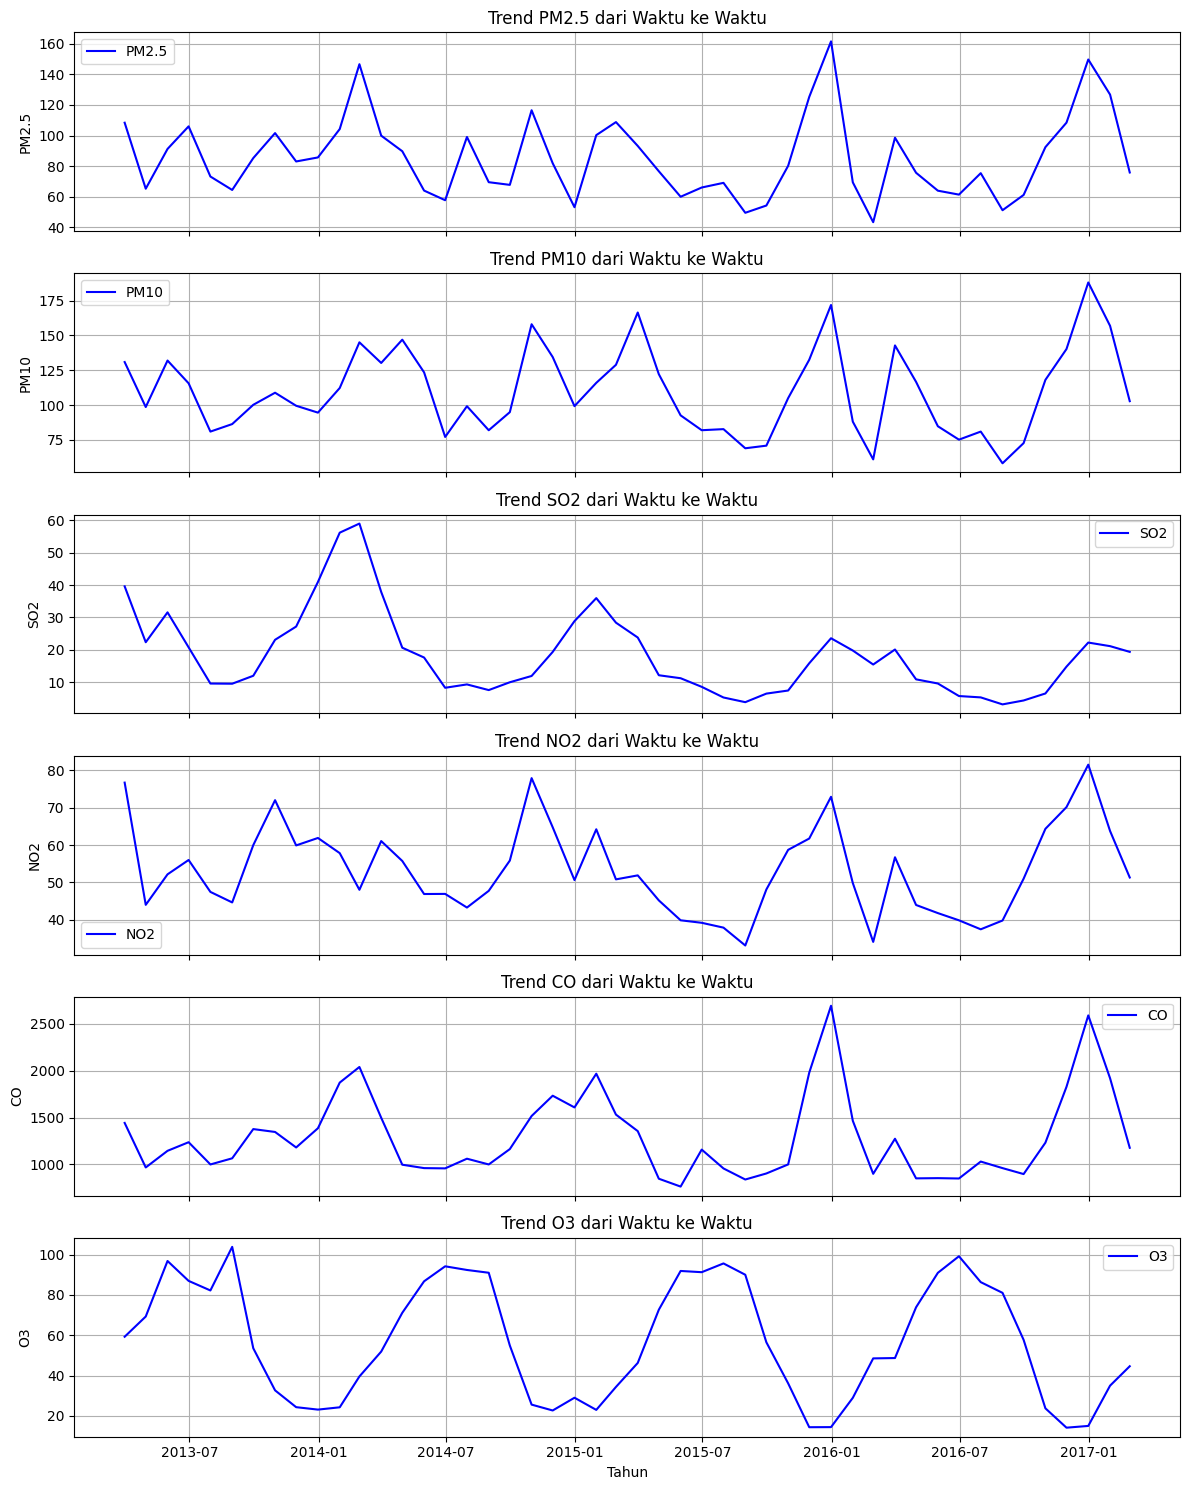

In [99]:
# Daftar polutan yang akan divisualisasikan
pollutants = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']

# Resample hanya untuk kolom numerik
df_monthly = df1[pollutants].resample('ME').mean()

# Figure dan axis untuk subplot
fig, axes = plt.subplots(len(pollutants), 1, figsize=(12, 15), sharex=True)

# Loop setiap polutan dan buat line chart
for i, pollutant in enumerate(pollutants):
    axes[i].plot(df_monthly.index, df_monthly[pollutant], label=pollutant, color='b')
    axes[i].set_title(f'Trend {pollutant} dari Waktu ke Waktu')
    axes[i].set_ylabel(pollutant)
    axes[i].legend()
    axes[i].grid(True)

plt.xlabel('Tahun')
plt.tight_layout()
plt.show()

### Pertanyaan 2: Bagaimana prediksi kondisi PM2.5 dalam beberapa periode ke depan? (Menggunakan Eksponensial Smoothing)

In [100]:
# Resample menjadi data bulanan (rata-rata tiap bulan)
df_pm25 = df1['PM2.5'].resample('ME').mean()

# Pisahkan data training dan testing (misal, 80% training)
train_size = int(len(df_pm25) * 0.8)
train, test = df_pm25[:train_size], df_pm25[train_size:]

# Buat model Exponential Smoothing (Holt-Winters)
model = ExponentialSmoothing(train, trend='add', seasonal=None)
fit = model.fit()

# Prediksi untuk data uji
pred_test = fit.forecast(len(test))

# Prediksi ke depan (misal 12 bulan ke depan)
future_pred = fit.forecast(12)

In [101]:
pred_test

,0
2016-05-31,80.199039
2016-06-30,79.930871
2016-07-31,79.662703
2016-08-31,79.394535
2016-09-30,79.126367
2016-10-31,78.858200
2016-11-30,78.590032
2016-12-31,78.321864
2017-01-31,78.053696
2017-02-28,77.785528


In [102]:
future_pred

,0
2016-05-31,80.199039
2016-06-30,79.930871
2016-07-31,79.662703
2016-08-31,79.394535
2016-09-30,79.126367
2016-10-31,78.858200
2016-11-30,78.590032
2016-12-31,78.321864
2017-01-31,78.053696
2017-02-28,77.785528


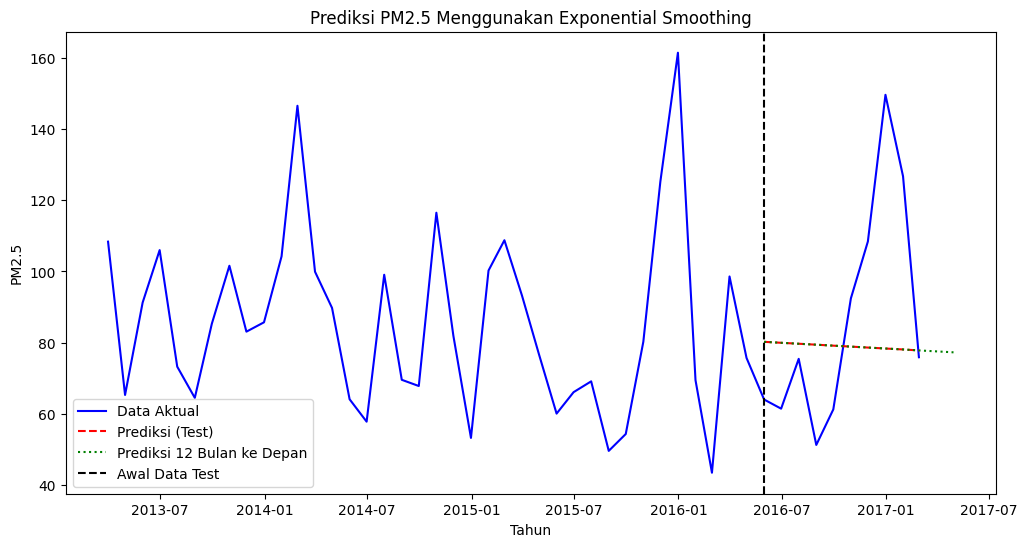

In [103]:
# Visualisasi hasil prediksi
plt.figure(figsize=(12, 6))
plt.plot(df_pm25, label="Data Aktual", color='blue')
plt.plot(pred_test, label="Prediksi (Test)", linestyle='dashed', color='red')
plt.plot(future_pred, label="Prediksi 12 Bulan ke Depan", linestyle='dotted', color='green')
plt.axvline(test.index[0], color='black', linestyle='dashed', label="Awal Data Test")
plt.legend()
plt.title("Prediksi PM2.5 Menggunakan Exponential Smoothing")
plt.xlabel("Tahun")
plt.ylabel("PM2.5")
plt.show()

**Insight:**
- Untuk menjawab pertanyaan 1, dilakukan visualisasi time series untuk melihat tren yang ada.
- Untuk menjawab pertanyaan 2, dilakukan pencarian prediksi dengan metode Exponential Smoothing.

## Conclusion

- Conclution pertanyaan 1:

Tren kualitas udara di Distrik Dongsi dalam beberapa tahun terakhir menunjukkan pola fluktuatif dengan kecenderungan peningkatan dan penurunan secara berkala. PM2.5 dan PM10 cenderung mengalami lonjakan signifikan pada beberapa periode, menunjukkan tingkat pencemaran yang meningkat dalam waktu tertentu sebelum kembali menurun. SO2 dan NO2 juga menunjukkan pola yang tidak stabil, dengan peningkatan dan penurunan yang bervariasi. CO mengalami lonjakan tajam pada beberapa titik waktu tertentu, yang mengindikasikan adanya faktor penyebab spesifik yang memicu peningkatan konsentrasi gas ini. Sementara itu, O3 memiliki pola yang lebih teratur, dengan siklus peningkatan dan penurunan yang terlihat jelas dari waktu ke waktu. Secara keseluruhan, tidak ada tren penurunan yang signifikan dalam jangka panjang, yang berarti kualitas udara di Distrik Dongsi masih mengalami tantangan dengan tingkat polusi yang berubah-ubah dari waktu ke waktu.

- Conclution pertanyaan 2:

Berdasarkan hasil prediksi menggunakan Exponential Smoothing, terlihat bahwa nilai PM2.5 yang diproyeksikan untuk 12 bulan ke depan menunjukkan pola yang relatif stabil tanpa adanya lonjakan signifikan. Model cenderung merata-ratakan tren sebelumnya dan tidak menangkap fluktuasi ekstrem yang terlihat pada data historis. Hal ini menunjukkan bahwa model lebih cocok untuk menangkap tren jangka panjang tetapi kurang sensitif terhadap variasi mendadak dalam waktu singkat. Jika pola PM2.5 di masa depan tetap mengikuti tren historis, maka tingkat polusi udara kemungkinan tidak akan mengalami perubahan drastis, tetapi model ini masih memiliki keterbatasan dalam menangkap lonjakan atau penurunan tajam yang mungkin terjadi akibat faktor eksternal seperti perubahan cuaca atau kebijakan lingkungan. Untuk peningkatan akurasi, metode yang lebih kompleks atau tambahan variabel eksternal dapat dipertimbangkan.

In [104]:
df1.to_csv('data_cleaned.csv', index=False)

In [105]:
df1

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
datetime,,,,,,,,,,,,,
2013-03-01 00:00:00,9.0,9.0,3.0,17.0,300.0,89.0000,-0.5,1024.5,-21.4,0.0,NNW,5.7,Dongsi
2013-03-01 01:00:00,4.0,4.0,3.0,16.0,300.0,88.0000,-0.7,1025.1,-22.1,0.0,NW,3.9,Dongsi
2013-03-01 02:00:00,7.0,7.0,10.0,17.0,300.0,60.0000,-1.2,1025.3,-24.6,0.0,NNW,5.3,Dongsi
2013-03-01 03:00:00,3.0,3.0,5.0,18.0,1000.0,44.1252,-1.4,1026.2,-25.5,0.0,N,4.9,Dongsi
2013-03-01 04:00:00,3.0,3.0,7.0,47.0,200.0,84.0000,-1.9,1027.1,-24.5,0.0,NNW,3.2,Dongsi
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-02-28 19:00:00,16.0,51.0,3.0,29.0,400.0,73.0000,12.5,1013.5,-16.2,0.0,NW,2.4,Dongsi
2017-02-28 20:00:00,18.0,45.0,3.0,43.0,500.0,54.0000,11.6,1013.6,-15.1,0.0,WNW,0.9,Dongsi
2017-02-28 21:00:00,23.0,58.0,5.0,61.0,700.0,28.0000,10.8,1014.2,-13.3,0.0,NW,1.1,Dongsi
